In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040084.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.407843  0.403922  0.403922  0.403922  0.403922  0.403922  0.407843   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.407843  0.411765  0.411765  ...  0.392157  0.392157  0.392157  0.396078   

       4196  4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.396078   0.4  0.403922  0.411765    108.666667      52.583333  

[1 rows x 4202 columns]
[108.66666667]  /  [52.58333333]
          0         1         2         3         4         5         6  \
0  0.407843  0.403922  0.403922  0.403922  0.403922  0.403922  0.407843   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.407843  0.411765  0.411765  ...  0.392157  0.392157  0.392157  0.392157   

       4194      4195      4196  4197      4198      4199  
0  0.392157  0.396078  0.396078   0.4  0.403922  0.411765  

[1 rows x 4200 columns]


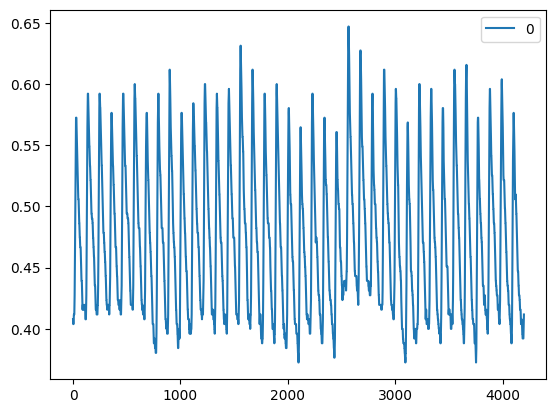

In [164]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [165]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

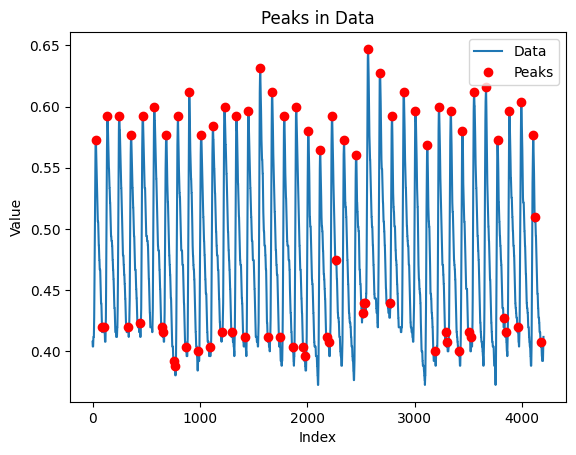

{'indices': array([  29,   92,  110,  139,  248,  328,  359,  438,  467,  575,  645,
        657,  686,  758,  767,  795,  873,  900,  985, 1011, 1090, 1120,
       1206, 1229, 1301, 1340, 1416, 1451, 1561, 1638, 1672, 1744, 1785,
       1865, 1896, 1964, 1974, 2009, 2119, 2182, 2198, 2230, 2265, 2341,
       2454, 2514, 2526, 2536, 2565, 2676, 2772, 2788, 2897, 3006, 3117,
       3188, 3226, 3288, 3301, 3336, 3413, 3444, 3503, 3527, 3552, 3664,
       3771, 3835, 3847, 3882, 3962, 3992, 4103, 4122, 4177]), 'values': array([0.57254902, 0.41960784, 0.41960784, 0.59215686, 0.59215686,
       0.41960784, 0.57647059, 0.42352941, 0.59215686, 0.6       ,
       0.41960784, 0.41568627, 0.57647059, 0.39215686, 0.38823529,
       0.59215686, 0.40392157, 0.61176471, 0.4       , 0.57647059,
       0.40392157, 0.58431373, 0.41568627, 0.6       , 0.41568627,
       0.59215686, 0.41176471, 0.59607843, 0.63137255, 0.41176471,
       0.61176471, 0.41176471, 0.59215686, 0.40392157, 0.6       ,
       0

In [166]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [176]:
def remove_close_values_df(df, threshold=0.15):
    """
    Remove rows from a DataFrame where the difference between consecutive values is less than the specified threshold.

    Parameters:
    - df: DataFrame
    - threshold: float, minimum difference required to keep a value (default: 0.2)

    Returns:
    - filtered_df: DataFrame with close values removed
    """
    filtered_df = df.iloc[:1]  # Start with the first row

    for i in range(1, len(df)):
        if abs(df.iloc[i]['Value'] - filtered_df.iloc[-1]['Value']) >= threshold:
            filtered_df = pd.concat([filtered_df, df.iloc[[i]]], ignore_index=True)

    return filtered_df


# Example usage
filtered_df = remove_close_values_df(peak_values_df)
print(filtered_df)

    Index     Value
0      29  0.572549
1      92  0.419608
2     139  0.592157
3     328  0.419608
4     359  0.576471
5     438  0.423529
6     467  0.592157
7     645  0.419608
8     686  0.576471
9     758  0.392157
10    795  0.592157
11    873  0.403922
12    900  0.611765
13    985  0.400000
14   1011  0.576471
15   1090  0.403922
16   1120  0.584314
17   1206  0.415686
18   1229  0.600000
19   1301  0.415686
20   1340  0.592157
21   1416  0.411765
22   1451  0.596078
23   1638  0.411765
24   1672  0.611765
25   1744  0.411765
26   1785  0.592157
27   1865  0.403922
28   1896  0.600000
29   1964  0.403922
30   2009  0.580392
31   2182  0.411765
32   2230  0.592157
33   2514  0.431373
34   2565  0.647059
35   2772  0.439216
36   2788  0.592157
37   3188  0.400000
38   3226  0.600000
39   3288  0.415686
40   3336  0.596078
41   3413  0.400000
42   3444  0.580392
43   3503  0.415686
44   3552  0.611765
45   3835  0.427451
46   3882  0.596078
47   3962  0.419608
48   3992  0.603922


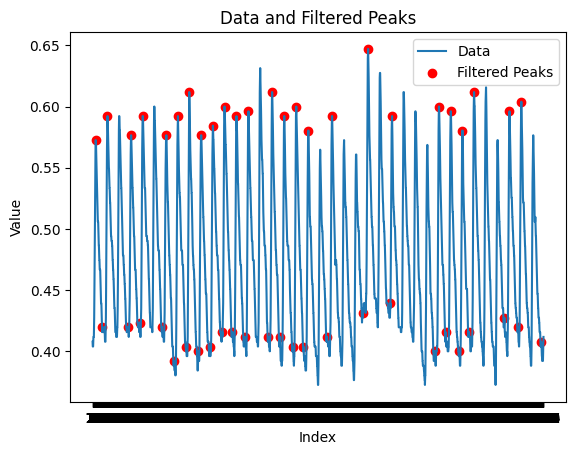

In [179]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()


In [181]:
def split_values_high_low(filtered_df, threshold=0.55):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[0.5725490196078431, None, 0.592156862745098, None, 0.5764705882352941, None, 0.592156862745098, None, 0.5764705882352941, None, 0.592156862745098, None, 0.611764705882353, None, 0.5764705882352941, None, 0.5843137254901961, None, 0.6, None, 0.592156862745098, None, 0.596078431372549, None, 0.611764705882353, None, 0.592156862745098, None, 0.6, None, 0.5803921568627451, None, 0.592156862745098, None, 0.6470588235294118, None, 0.592156862745098, None, 0.6, None, 0.596078431372549, None, 0.5803921568627451, None, 0.611764705882353, None, 0.596078431372549, None, 0.6039215686274509, None]
[None, 0.4196078431372549, None, 0.4196078431372549, None, 0.4235294117647059, None, 0.4196078431372549, None, 0.392156862745098, None, 0.403921568627451, None, 0.4, None, 0.403921568627451, None, 0.4156862745098039, None, 0.4156862745098039, None, 0.4117647058823529, None, 0.4117647058823529, None, 0.4117647058823529, None, 0.403921568627451, None, 0.403921568627451, None, 0.4117647058823529, None, 0.43

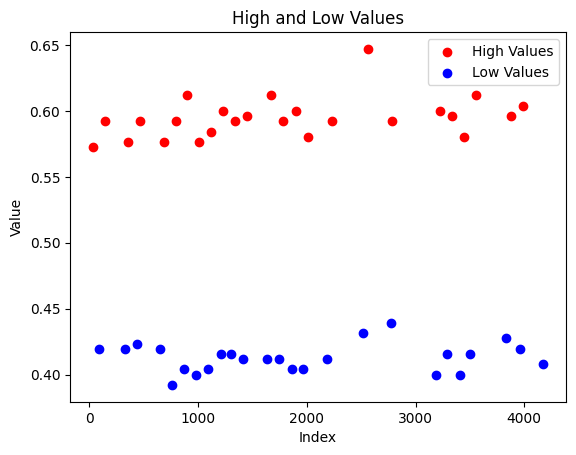

In [182]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [183]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.5946666666666666
Average Low Value: 0.4130196078431373
